In [1]:
# importing packages:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from sklearn:
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# evaluation metrics of model:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
# reading data using pd.read_excel('file_name'):
excel_data = pd.read_excel('cell_samples_data.xlsx')

In [3]:
# looking at 10 rows of dataset:
excel_data.head(10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


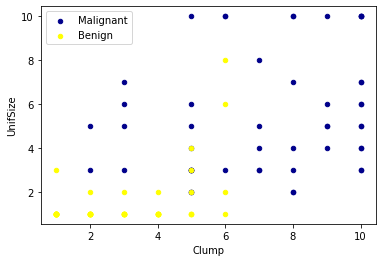

In [4]:
# visualization of data:
ax= excel_data[excel_data['Class']==4][0:50].plot(kind='scatter', x='Clump', y='UnifSize',
                                                                          color='DarkBlue', label='Malignant')

excel_data[excel_data['Class']==2][0:50].plot(kind='scatter', x='Clump', y='UnifSize',
                                                                   color='Yellow', label='Benign', ax = ax)
plt.show()

In [5]:
# Let's look at data type of columns:
excel_data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

___

- **as you can see, the column (BareNuc) isn't numerical because it has some non numerical values like (?) in itself.**
___

In [6]:
print('(BareNuc) befor preprocessing:')
print(excel_data['BareNuc'].dtypes, '\n')
excel_data = excel_data[pd.to_numeric(excel_data['BareNuc'], errors = 'coerce').notnull()].copy()
excel_data['BareNuc']  = excel_data['BareNuc'].astype(int)
print('(BareNuc) after preprocesisng:\n', excel_data['BareNuc'].dtypes)



(BareNuc) befor preprocessing:
object 

(BareNuc) after preprocesisng:
 int32


In [7]:
# defining X (as inputs):
x_inp = excel_data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x_inp = np.asarray(x_inp)
print('X input:')
print(x_inp[:10, :])

X input:
[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]
 [ 8 10 10  8  7 10  9  7  1]
 [ 1  1  1  1  2 10  3  1  1]
 [ 2  1  2  1  2  1  3  1  1]
 [ 2  1  1  1  2  1  1  1  5]
 [ 4  2  1  1  2  1  2  1  1]]


In [8]:
# defining Y as output:
y_out = excel_data[['Class']]
y_out = np.asarray(y_out).reshape((y_out.shape[0]*y_out.shape[1], ))
print('Y output:')
print(y_out[:10])

Y output:
[2 2 2 2 2 4 2 2 2 2]


In [9]:
# Let's see the shape of X and Y:
print('the shape of x = ', x_inp.shape)
print('the shape of y = ', y_out.shape)

the shape of x =  (683, 9)
the shape of y =  (683,)


In [10]:
# now it's time to set data to train/test split:
x_train, x_test, y_train, y_test = train_test_split(x_inp, y_out, test_size=0.2, random_state=4)

#print:
print('shape of x train = ', x_train.shape)
print('shape of x test = ', x_test.shape)
print('shape of y train = ', y_train.shape)
print('shape of y test = ', y_test.shape)
print('____________________')

shape of x train =  (546, 9)
shape of x test =  (137, 9)
shape of y train =  (546,)
shape of y test =  (137,)
____________________


___

### The SVM algorithm:
offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:<br>
<b>1.Linear <br>
2.Polynomial (poly)<br>
3.Radial basis function (rbf) <br>
4.Sigmoid </b><br>
Each of these functions has its characteristics, its pros and cons, and its equation. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function)
___

In [11]:
# Creating our SVM model as Classifier:
print('kernel= [rbf, linear, poly, sigmoid]', '\n')
kernel_name = input('Enter kernel name(from above) ==> ')
svm_model_1 = svm.SVC(kernel = kernel_name)     # SVC = Support Vector Classifier
svm_model_1.fit(x_train, y_train)

kernel= [rbf, linear, poly, sigmoid] 

Enter kernel name(from above) ==> rbf


SVC()

In [12]:
# Using (svm_model) to predict on test data:
y_hat1 = svm_model_1.predict(x_test)
# printing results:
print('y hat:\n')
print(y_hat1[:10])

y hat:

[2 4 2 4 2 2 2 2 4 2]


In [13]:
# defining a functin for confusion matrix plotting:

def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


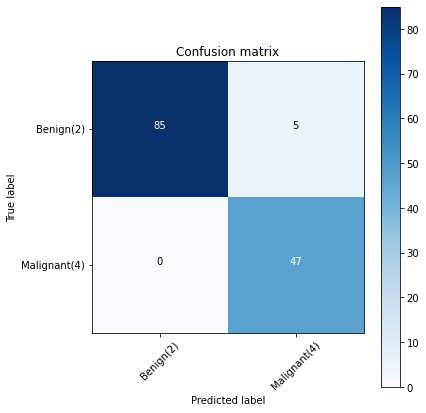

In [14]:
# Plot non-normalized confusion matrix:
eval_0 = confusion_matrix(y_test, y_hat1, labels=[2,4])
np.set_printoptions(precision=2)

plt.figure(figsize=(6, 6))
confusion_matrix_plot(eval_0, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

___

### About Evaluation Metrics:

- for evaluation of the model we can use:<br>
1) <a href="https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/"> R2 Score</a> (click)<br> 
2) <a href="https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9"> F1 Score </a> (click)<br>
3) <a href="https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62"> Confusion Matrix</a> (click)<br>
4) <a href="https://towardsdatascience.com/categorical-data-jaccards-coefficient-and-multiprocessing-b4a7bd5d90f6"> Jaccard Score</a> (click)<br>
5) <a href="https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a"> Log Loss </a> (click)
___

In [15]:
# using metrics methods to evaluate our model:

eval_1 = f1_score(y_test, y_hat1, average='weighted')
eval_2 = jaccard_score(y_test, y_hat1, pos_label=2)
eval_3 = confusion_matrix(y_test, y_hat1, labels=[2, 4])

print('f1 score:\n ', eval_1, '\n')
print('jaccard score:\n', eval_2, '\n')
print('confusion matrix: \n', eval_3, '\n')

f1 score:
  0.9639038982104676 

jaccard score:
 0.9444444444444444 

confusion matrix: 
 [[85  5]
 [ 0 47]] 



In [16]:
# which kernel perfumes better ?! (f1 score)
kernel_list = ['rbf', 'linear','poly', 'sigmoid']
eval_list = []
for i, kernel in enumerate(kernel_list):
    svm_model = svm.SVC(kernel=kernel).fit(x_train, y_train)
    y_hat = svm_model.predict(x_test)
    eval_model = f1_score(y_test, y_hat, average='weighted')
    eval_list.append(eval_model)
    print('kernel = ', kernel,'\n')
    
print('evaluations results:')    
print(eval_list)

kernel =  rbf 

kernel =  linear 

kernel =  poly 

kernel =  sigmoid 

evaluations results:
[0.9639038982104676, 0.9639038982104676, 0.9710669934861801, 0.3714602361753353]


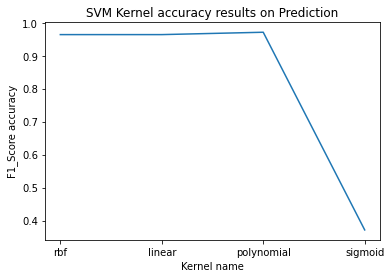

In [17]:
# plotting results:
x = [1, 2, 3, 4]
x_ticks = ['rbf', 'linear', 'polynomial', 'sigmoid']
plt.xticks(x, x_ticks)  # to change 1, 2, 3, 4 => [rbf, linear, polynomial, sigmoid in x-axis]
plt.plot(x, eval_list)
plt.title('SVM Kernel accuracy results on Prediction')
plt.xlabel('Kernel name')
plt.ylabel('F1_Score accuracy')
plt.show()